# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


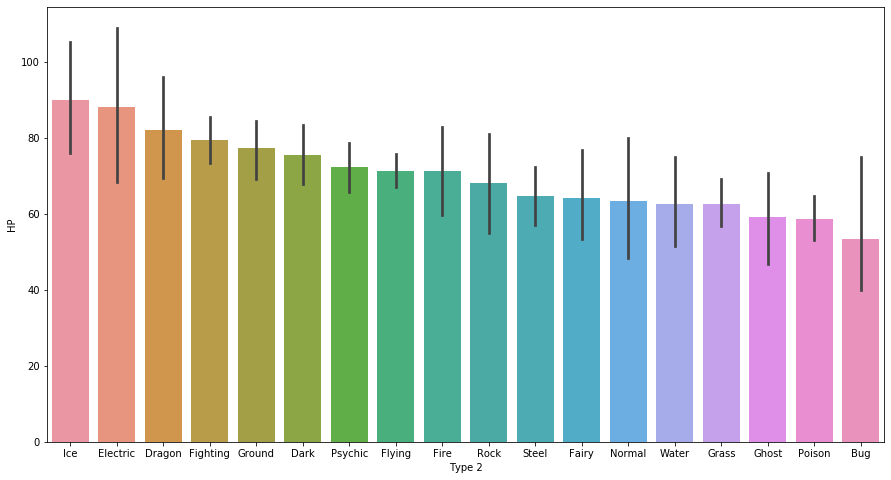

In [3]:
plt.figure(figsize=(15,8))
result = df.groupby('Type 2')['HP'].aggregate(np.mean).reset_index().sort_values('HP', ascending=False)
sns.barplot(x='Type 2', y='HP', data = df, estimator=np.mean, order=result['Type 2'])

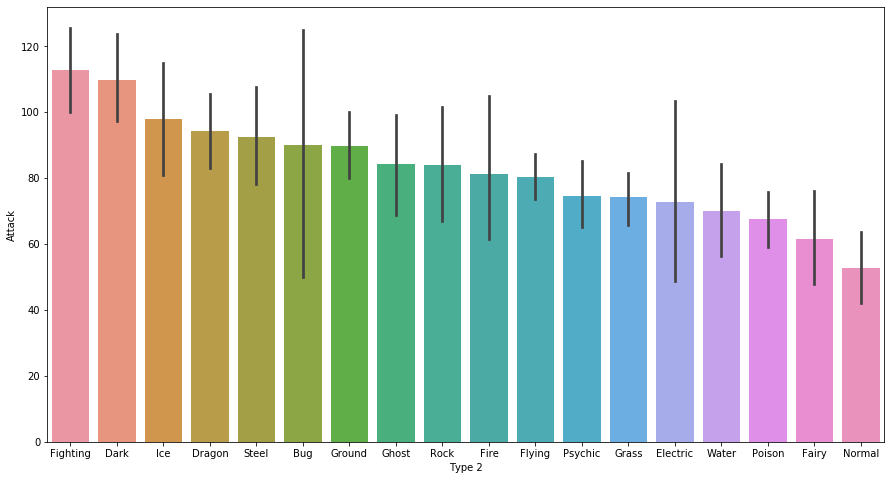

In [4]:
plt.figure(figsize=(15,8))
result = df.groupby('Type 2')['Attack'].aggregate(np.mean).reset_index().sort_values('Attack', ascending=False)
sns.barplot(x='Type 2', y='Attack', data = df, estimator=np.mean, order=result['Type 2'])

/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


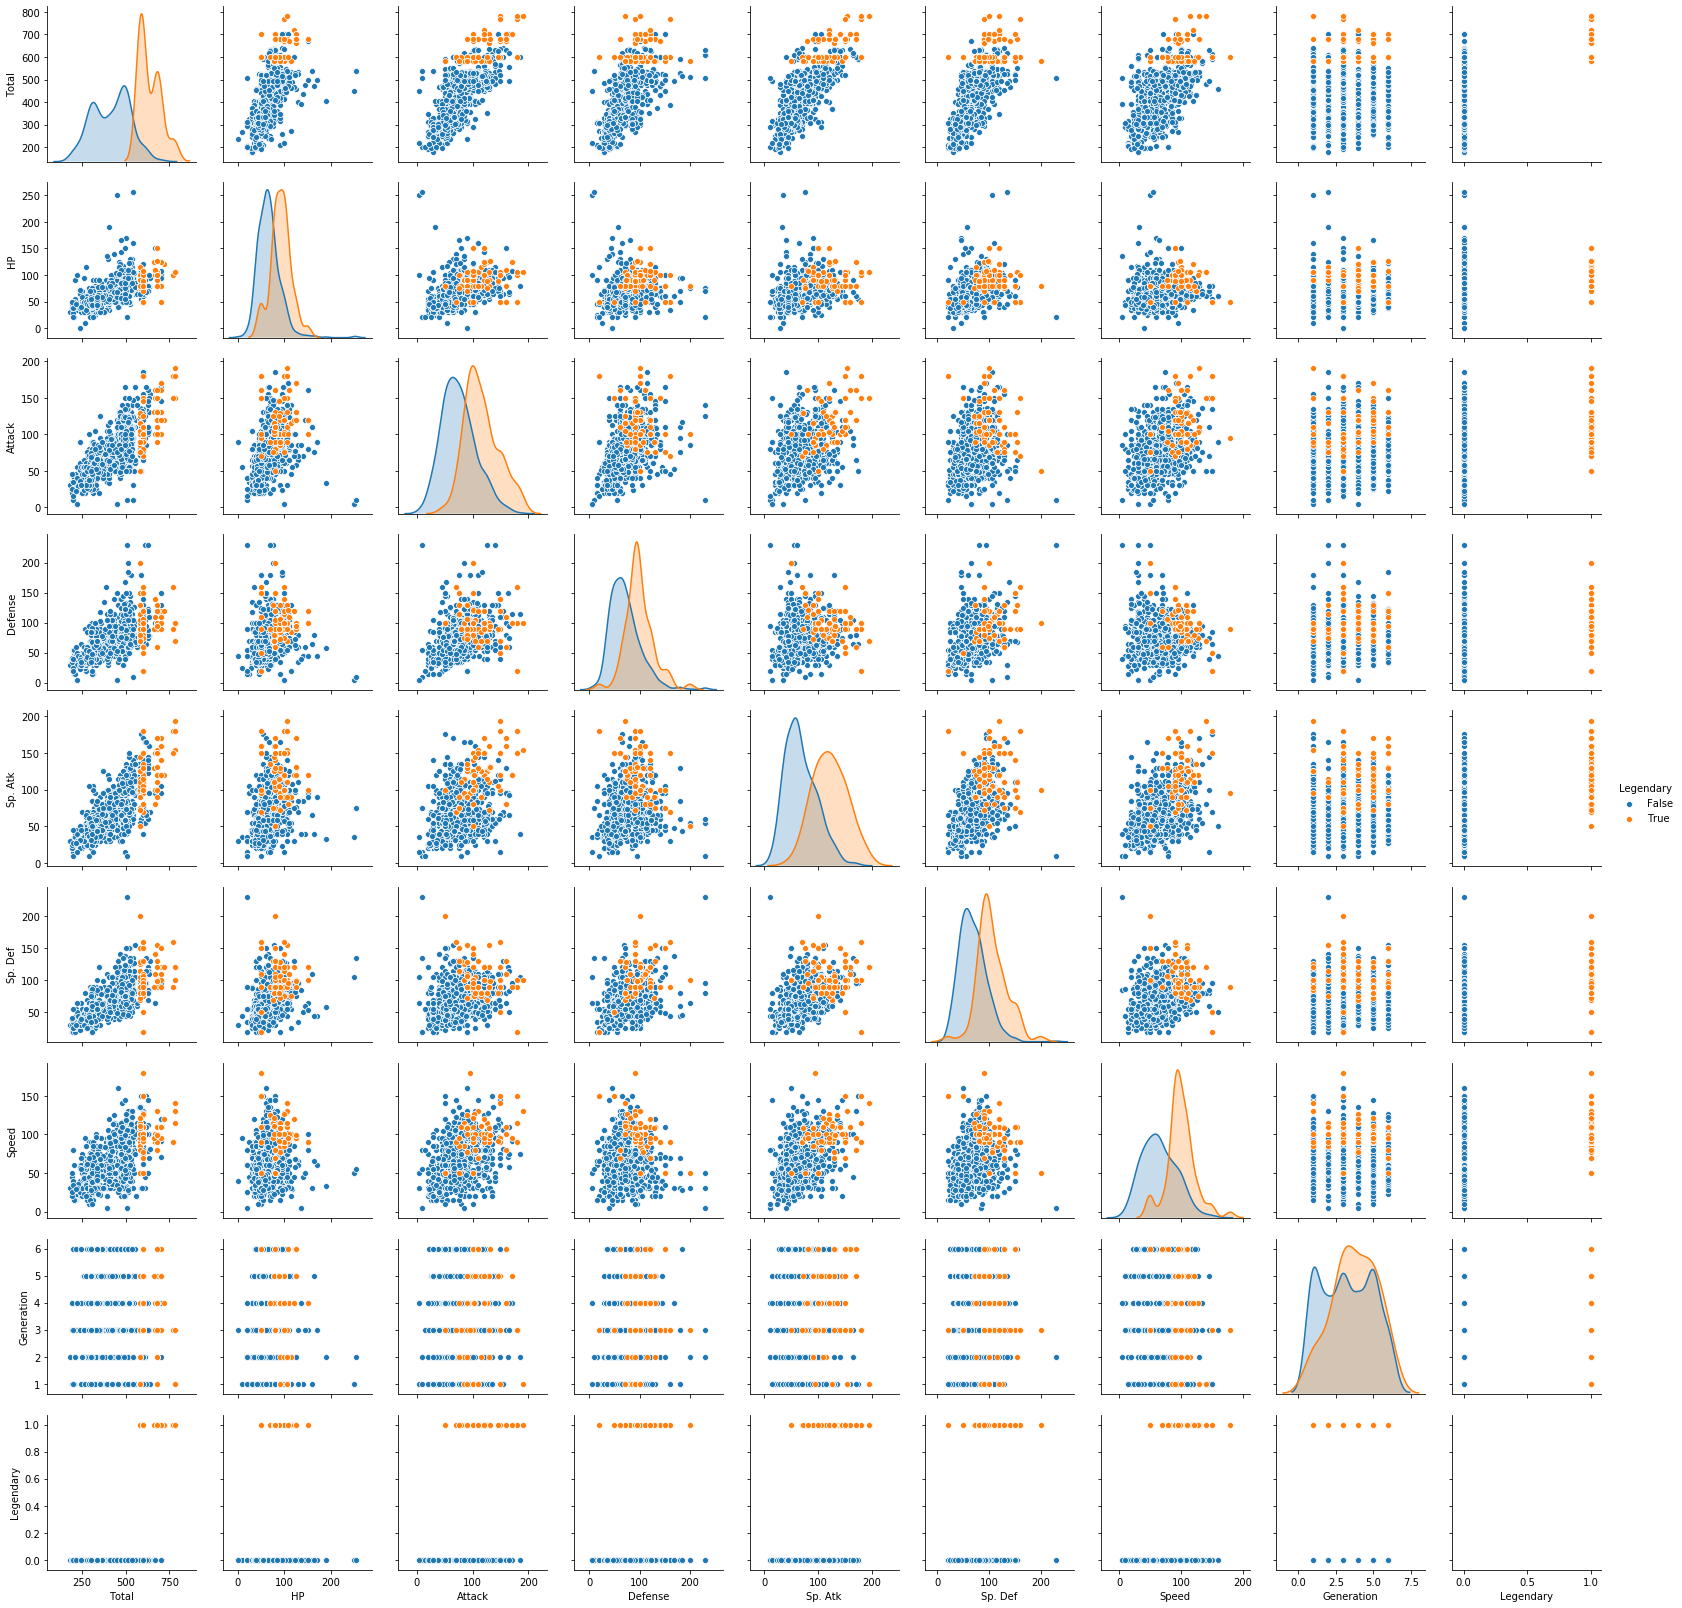

In [5]:
sns.pairplot(df.drop(['#', 'Name', 'Type 1', 'Type 2'], axis=1), hue='Legendary')

In [13]:
def missing(df):
    if pd.isnull(df['Type 2']):
        return 'Yes'
    else:
        return 'No'
df['Type 2 Missing'] = df.apply(missing, axis=1)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 2 Missing
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,No
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,No
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,No
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,No
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Yes


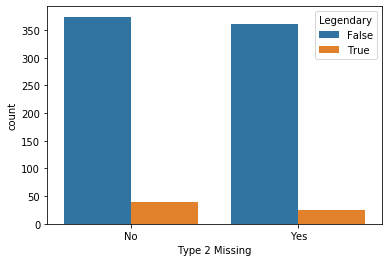

In [14]:
sns.countplot(x='Type 2 Missing', hue='Legendary', data=df)

In [15]:
df2 = df.groupby('Type 2')['HP','Attack'].mean()

In [16]:
df2['Sum'] = df2['HP'] + df2['Attack']
df2

,HP,Attack,Sum
Type 2,,,
Bug,53.333333,90.000000,143.333333
Dark,75.550000,109.800000,185.350000
Dragon,82.166667,94.444444,176.611111
Electric,88.166667,72.666667,160.833333
Fairy,64.304348,61.608696,125.913043
Fighting,79.461538,112.846154,192.307692
Fire,71.250000,81.250000,152.500000
Flying,71.391753,80.288660,151.680412
Ghost,59.142857,84.142857,143.285714


In [18]:
df['Sum'] = df['HP'] + df['Attack']
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 2 Missing,Sum
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,No,94
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,No,122
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,No,162
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,No,180
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Yes,91


In [38]:
hp = abs(39-df2['HP']).sort_values()
hp

Type 2
Bug         14.333333
Poison      19.764706
Ghost       20.142857
Grass       23.640000
Water       23.714286
Normal      24.500000
Fairy       25.304348
Steel       25.636364
Rock        29.071429
Fire        32.250000
Flying      32.391753
Psychic     33.212121
Dark        36.550000
Ground      38.228571
Fighting    40.461538
Dragon      43.166667
Electric    49.166667
Ice         51.000000
Name: HP, dtype: float64

In [31]:
att = abs(39-df2['Attack']).sort_values()
att

Type 2
Normal      13.750000
Fairy       22.608696
Poison      28.588235
Water       31.142857
Electric    33.666667
Grass       35.160000
Psychic     35.696970
Flying      41.288660
Fire        42.250000
Rock        45.000000
Ghost       45.142857
Ground      50.857143
Bug         51.000000
Steel       53.590909
Dragon      55.444444
Ice         59.000000
Dark        70.800000
Fighting    73.846154
Name: Attack, dtype: float64

In [50]:
sm = abs(39-df2['Sum']).sort_values()
sm

Type 2
Normal       77.250000
Fairy        86.913043
Poison       87.352941
Water        93.857143
Grass        97.800000
Ghost       104.285714
Bug         104.333333
Psychic     107.909091
Flying      112.680412
Rock        113.071429
Fire        113.500000
Steel       118.227273
Electric    121.833333
Ground      128.085714
Dragon      137.611111
Dark        146.350000
Ice         149.000000
Fighting    153.307692
Name: Sum, dtype: float64

In [52]:
d

TypeError: 'Index' object is not callable

In [10]:
def impute_type(df):
    Type = df['Type 2']
    if pd.isnull(Type):
        return df2[abs(df['Sum']-(df2['Sum'])) == abs(df['Sum']-(df2['Sum'])).min()].index[0]
    else:
        return Type

In [11]:
df['Type 2'] = df.apply(impute_type, axis=1)

KeyError: ('Sum', 'occurred at index 4')

In [ ]:
df.head